In [1]:
import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # creating instance of StandardScaler


from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import roc_curve, roc_auc_score, auc ,plot_confusion_matrix

from sklearn.model_selection import learning_curve

from sklearn.model_selection import StratifiedKFold, GridSearchCV, ShuffleSplit

from mlxtend.plotting import plot_confusion_matrix

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('fraud_detection_bank_dataset.csv')
data.shape

(20468, 114)

In [3]:
data.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [4]:
data.tail()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0
20467,20467,4,399,0,3,0,1,7,4,0,...,0,1,0,1,1,0,0,0,72,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [6]:
data.isnull().sum()

Unnamed: 0    0
col_0         0
col_1         0
col_2         0
col_3         0
             ..
col_108       0
col_109       0
col_110       0
col_111       0
targets       0
Length: 114, dtype: int64

In [7]:
# handling to outlayers 
data.describe()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5116.750000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,10233.500000,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,15350.250000,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,20467.000000,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


In [8]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
IQR

Unnamed: 0    10233.50
col_0             2.00
col_1           245.00
col_2             0.00
col_3             2.00
                ...   
col_108           0.00
col_109           0.00
col_110           0.00
col_111          56.25
targets           1.00
Length: 114, dtype: float64

In [9]:
# this mean that any thing less then mini and greater then max print it 
((data < (Q1 - 1.5 * IQR))  | (data > (Q3 + 1.5 * IQR))).sum()

Unnamed: 0       0
col_0         2503
col_1         2172
col_2         2366
col_3         1135
              ... 
col_108          1
col_109       1010
col_110        288
col_111       1356
targets          0
Length: 114, dtype: int64

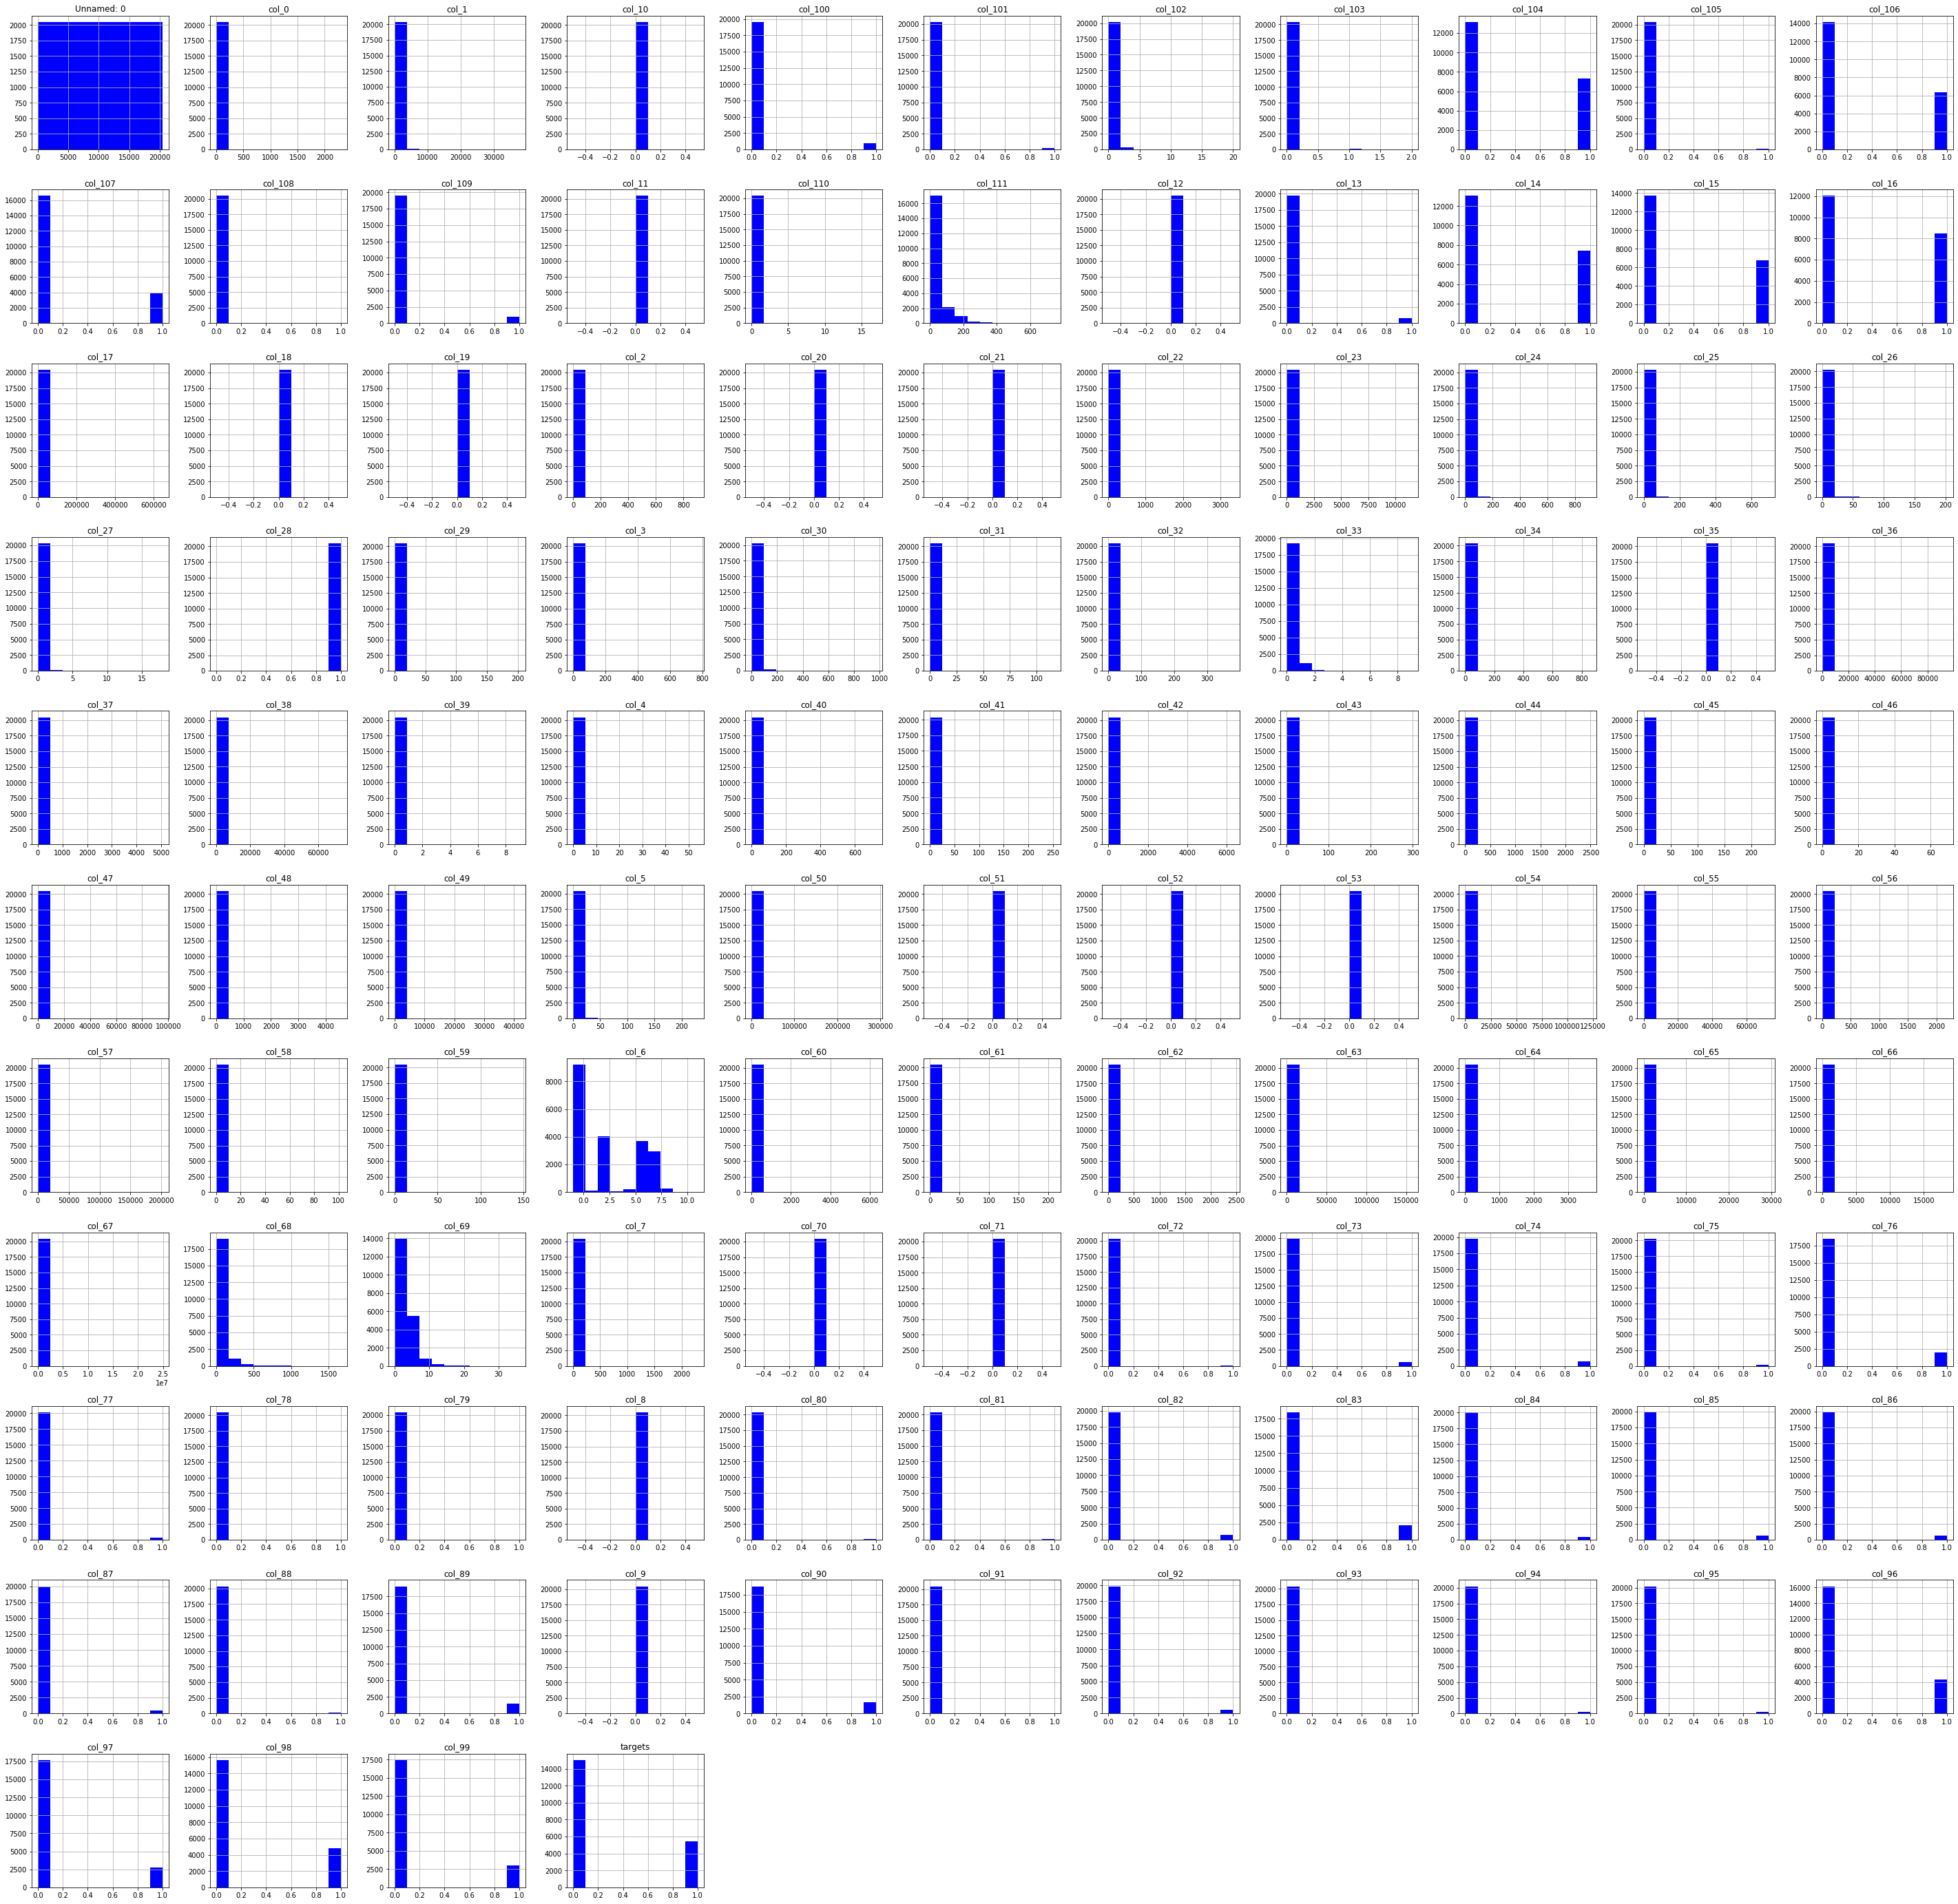

In [10]:
data.hist(figsize=(50,50),color='blue') 
plt.show()

In [11]:
names = ['col_0','col_1','col_2','col_3','col_4','col_5','col_6','col_7','col_8','col_9',
         'col_10','col_11','col_12','col_13','col_14','col_15','col_16','col_17','col_18','col_19',
         'col_20','col_21','col_22','col_23','col_24','col_25','col_26','col_27','col_28','col_29',
         'col_30','col_31','col_32','col_33','col_34','col_35','col_36','col_37','col_38','col_39',
         'col_40','col_41','col_42','col_43','col_44','col_45','col_46','col_47','col_48','col_49',
         'col_50','col_51','col_52','col_53','col_54','col_55','col_56','col_57','col_58','col_59',
         'col_60','col_61','col_62','col_63','col_64','col_65','col_66','col_67','col_68','col_69',
         'col_70','col_71','col_72','col_73','col_74','col_75','col_76','col_77','col_78','col_79',
         'col_80','col_81','col_82','col_83','col_84','col_85','col_86','col_87','col_88','col_89',
         'col_90','col_91','col_92','col_93','col_94','col_95','col_96','col_97','col_98','col_99',
         'col_100','col_101','col_102','col_103','col_104','col_105','col_106','col_107','col_108','col_109',
         'col_110','col_111','targets']

In [12]:
for x in names:
    
    a = data[x].quantile(0.10)
    b = data[x].quantile(0.90)
    
    Q1=data[x].quantile(0.25)
    Q3=data[x].quantile(0.75)
    IQR=Q3-Q1
    Min= Q1 - 1.5 * IQR
    Max= Q3 + 1.5 * IQR
    
    data[x] = np.where(data[x] <Min, a,data[x])
    data[x] = np.where(data[x] >Max, b,data[x])

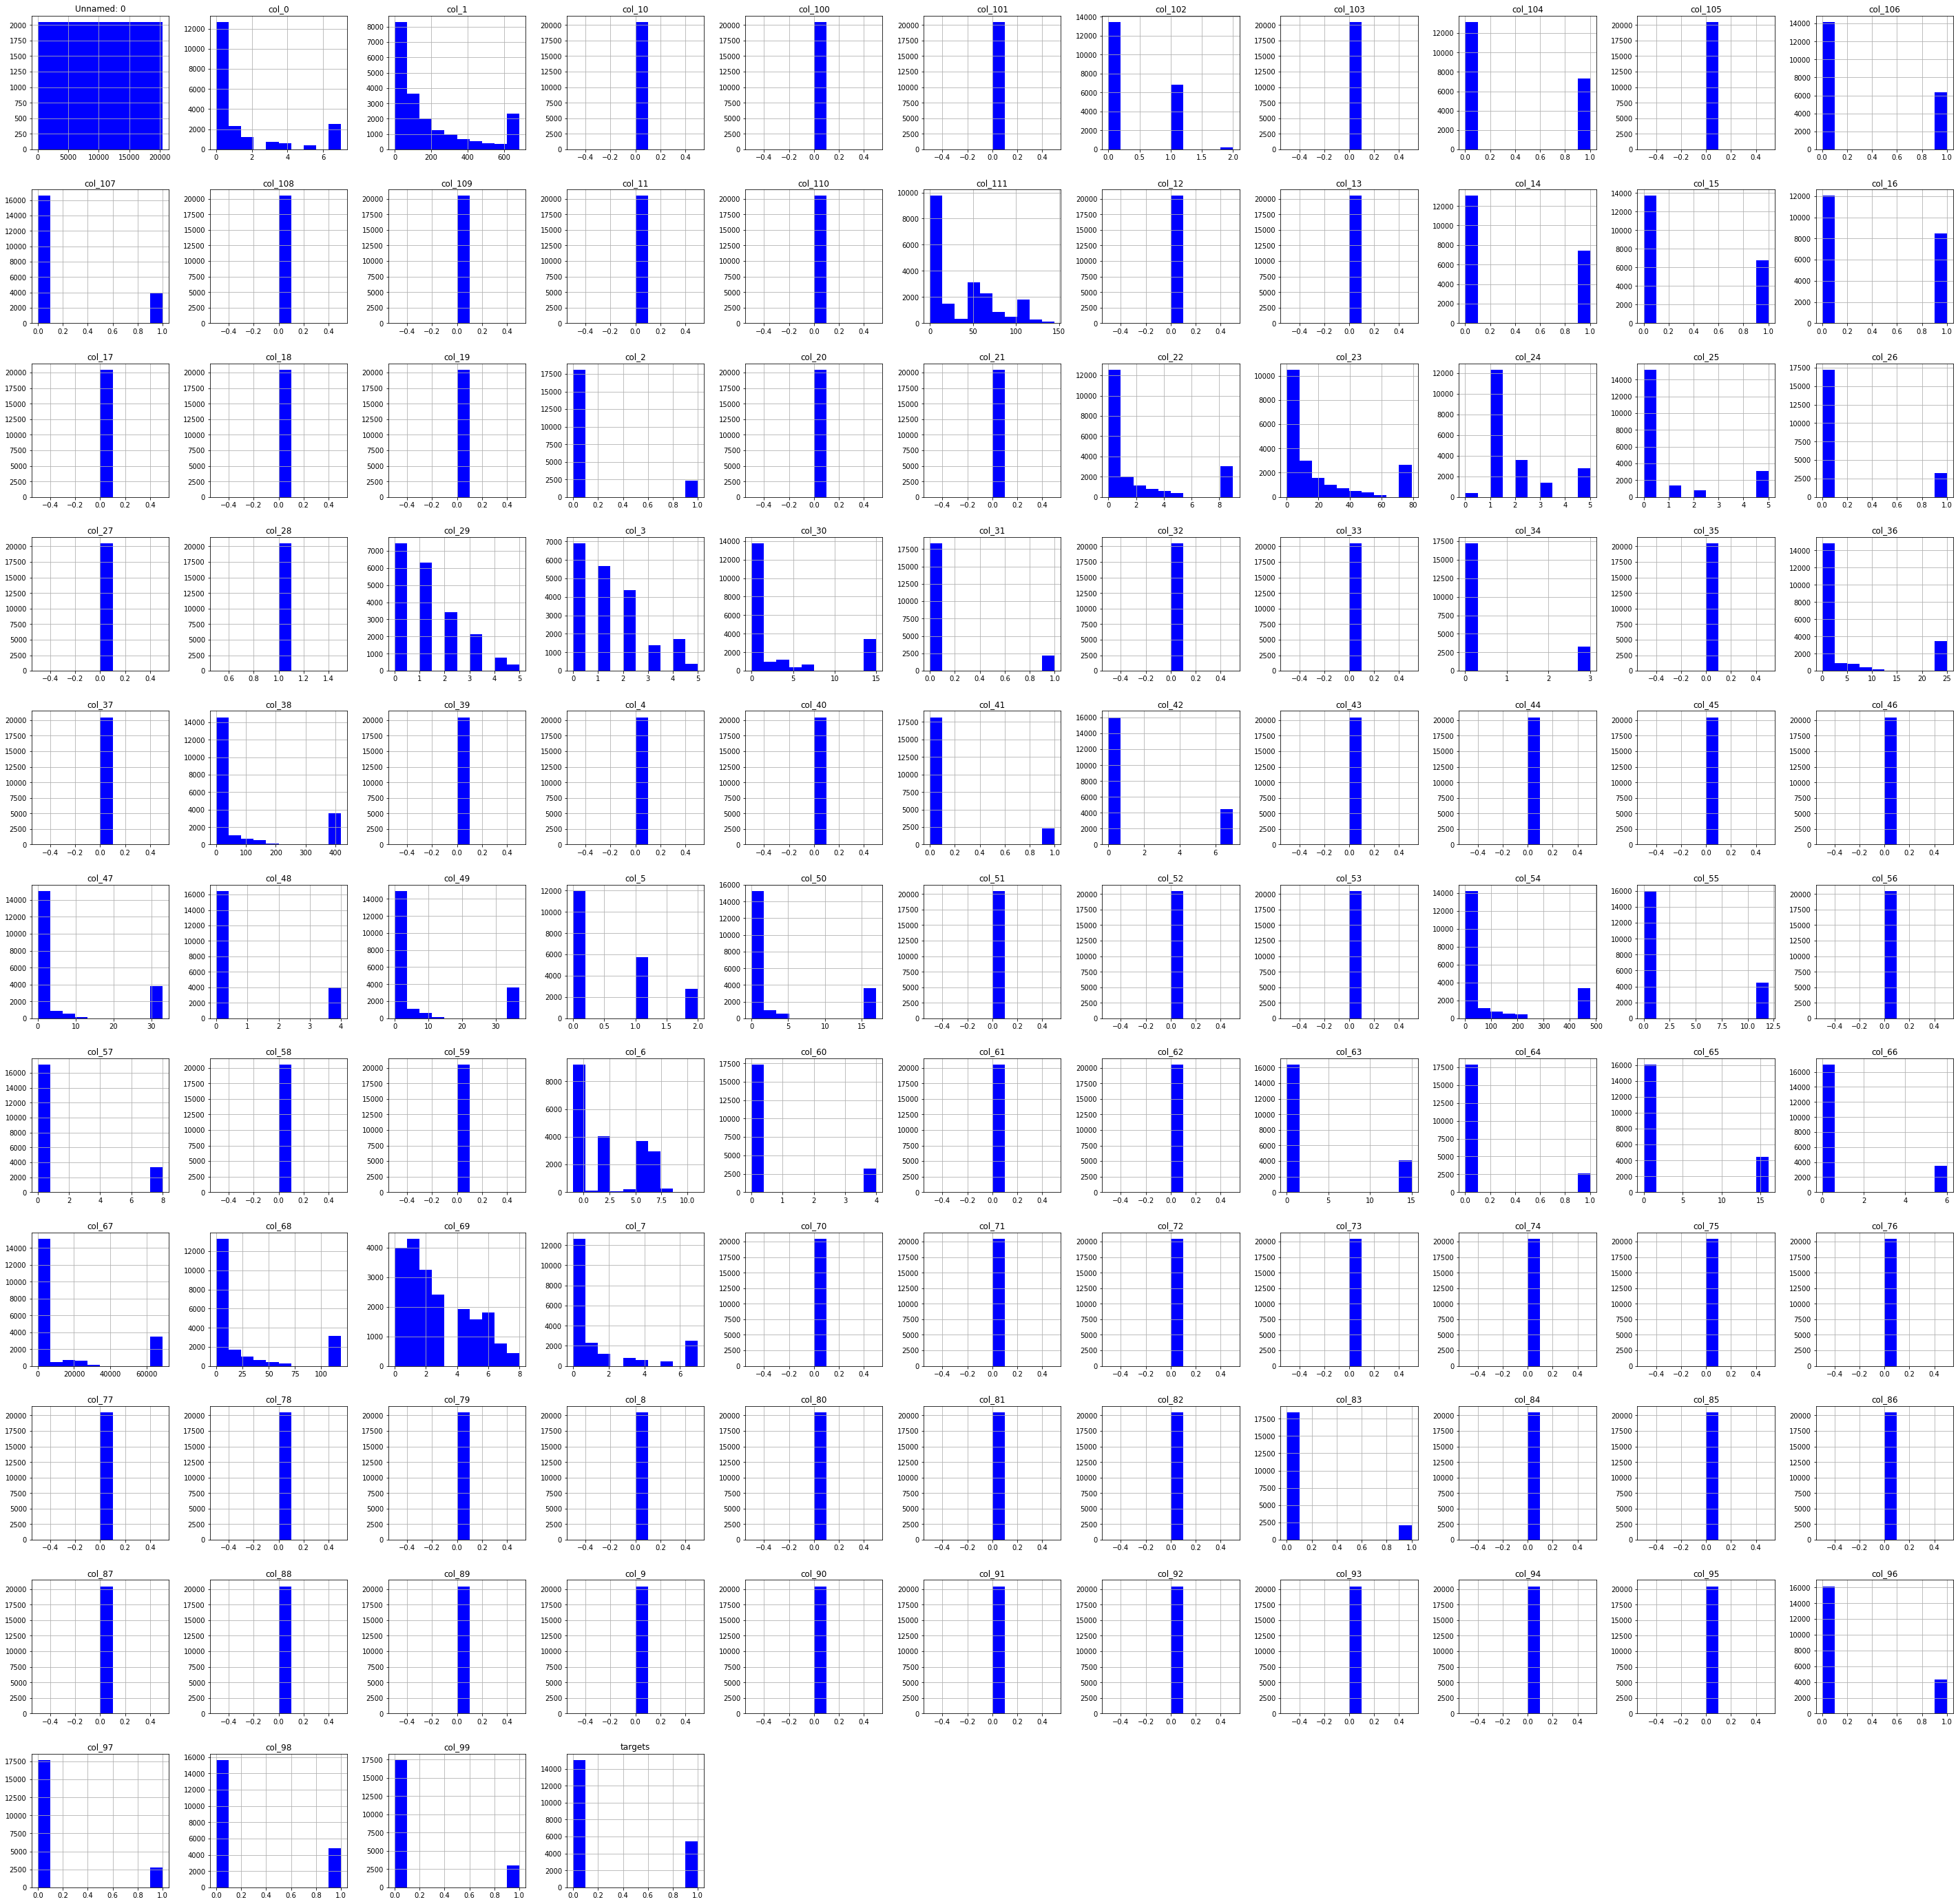

In [13]:
data.hist(figsize=(50,50),color='blue') 
plt.show()

In [14]:
# Splitting data into Training data and Testing data

y = data['targets'] 
#print(y) 

X = data.iloc[:,:-1]
#print(X) 

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.15)

print("shape of X_trian :",X_train.shape)
print("shape of X_test :",X_test.shape)

shape of X_trian : (17397, 113)
shape of X_test : (3071, 113)


In [15]:
# scaling

scaler = StandardScaler()
scaler_X_train=scaler.fit_transform(X_train)
scaler_X_train

array([[ 1.49374026, -0.59728113, -0.29025913, ...,  0.        ,
         0.        , -0.76255921],
       [ 1.71226465,  2.34715066,  0.88558572, ...,  0.        ,
         0.        , -0.97804185],
       [-1.53261953, -0.59728113, -0.84602955, ...,  0.        ,
         0.        , -0.97804185],
       ...,
       [-0.06299229, -0.59728113,  0.05422666, ...,  0.        ,
         0.        ,  0.74581927],
       [ 0.09836396,  1.08525132, -0.37293573, ...,  0.        ,
         0.        , -0.97804185],
       [-1.26606037, -0.59728113, -0.68067637, ...,  0.        ,
         0.        ,  1.2306552 ]])

In [16]:
scaler_X_test=scaler.transform(X_test)
scaler_X_test

array([[ 0.92544155,  2.34715066,  1.82258709, ...,  0.        ,
         0.        ,  0.93436657],
       [-0.55382647, -0.17664802, -0.43723974, ...,  0.        ,
         0.        , -0.78949454],
       [ 1.2197391 , -0.59728113, -0.78172554, ...,  0.        ,
         0.        , -0.60094723],
       ...,
       [ 1.57610975, -0.59728113, -0.84602955, ...,  0.        ,
         0.        , -0.43933525],
       [ 0.87977469, -0.17664802, -0.44642603, ...,  0.        ,
         0.        ,  0.42259531],
       [ 0.58412405, -0.59728113, -0.49695061, ...,  0.        ,
         0.        , -0.81642987]])

In [17]:
# traing --- SVM modle 

svc_clf = SVC(C=.1, kernel='sigmoid', degree=3 , gamma='auto')

svc_clf.fit(scaler_X_train,y_train)

svc_clf_predictions = svc_clf.predict(scaler_X_test)

In [18]:
a=accuracy_score(y_test,svc_clf_predictions)
print('Accuracy:',a*100)

Accuracy: 97.39498534679257


In [19]:
p=precision_score(y_test,svc_clf_predictions)
print('Precision:',p*100) # number of right predications 

Precision: 96.94555112881807


In [20]:
r=recall_score(y_test,svc_clf_predictions) 
print('Recall:',r*100) 

Recall: 92.75730622617534


### Visulisation

(<Figure size 576x504 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdf28ff448>)

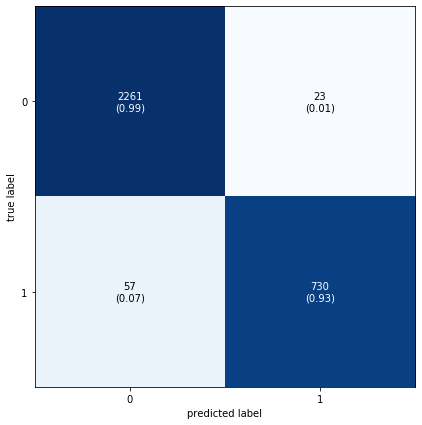

In [21]:
# confusion_matrix

c=confusion_matrix(y_test,svc_clf_predictions)
plot_confusion_matrix(conf_mat = c,figsize=(8,7),show_normed = True)

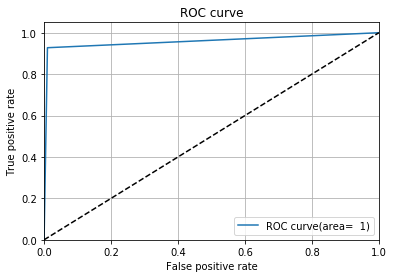

In [22]:
# ROC 

fpr,tpr,_=roc_curve(y_test,svc_clf_predictions)

#calculate AUC
roc_auc=auc(fpr,tpr)


#plot of ROC curve for a specified class

plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

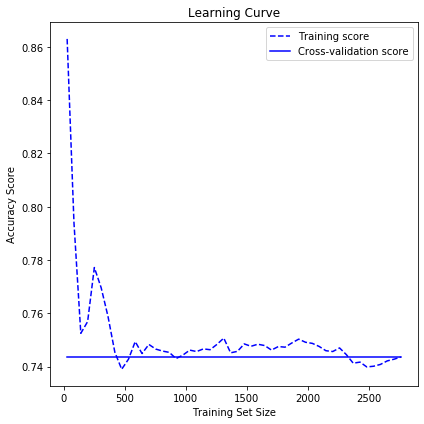

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(svc_clf,
                                                        X_test, y_test, cv=10, scoring='accuracy',
                                                        train_sizes=np.linspace(0.01, 1.0, 50))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color='blue',  label="Training score")
plt.plot(train_sizes, test_mean, color='blue', label="Cross-validation score")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()